<a href="https://colab.research.google.com/github/nelsonbeas33/procesamiento-datos/blob/main/tarea2/tarea2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.sentiment import SentimentIntensityAnalyzer
from transformers import pipeline

# Descargar recursos de NLTK
nltk.download('punkt')
nltk.download('stopwords')

# Cargar el conjunto de datos desde Google Drive
file_path = '/content/drive/MyDrive/procesamiento de datos/products.csv'  # Ruta correcta
df = pd.read_csv(file_path)

# Ver las primeras filas del DataFrame y las columnas disponibles
print(df.head())
print("Columnas disponibles:", df.columns)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  
Columnas disponibles: Index(['product_id', 'product_name', 'aisle_id', 'department_id'], dtype='object')


In [14]:
# Función para limpiar el texto (eliminar caracteres especiales, convertir a minúsculas)
def clean_and_tokenize(text):
    text = text.lower()  # Convertir a minúsculas
    text = re.sub(r'[^a-záéíóúüñ\s]', '', text)  # Eliminar caracteres especiales
    words = word_tokenize(text)  # Tokenización
    stop_words = set(stopwords.words('spanish'))
    return [word for word in words if word not in stop_words]

# Aplicar limpieza y tokenización
df['tokens'] = df['product_name'].apply(clean_and_tokenize)

# Función para hacer stemming
stemmer = SnowballStemmer('spanish')

def apply_stemming(tokens):
    return [stemmer.stem(word) for word in tokens]

# Aplicar stemming a los tokens
df['stemmed_tokens'] = df['tokens'].apply(apply_stemming)

# Mostrar las primeras filas para verificar el preprocesamiento
print(df[['product_name', 'tokens', 'stemmed_tokens']].head())

                                        product_name  \
0                         Chocolate Sandwich Cookies   
1                                   All-Seasons Salt   
2               Robust Golden Unsweetened Oolong Tea   
3  Smart Ones Classic Favorites Mini Rigatoni Wit...   
4                          Green Chile Anytime Sauce   

                                              tokens  \
0                     [chocolate, sandwich, cookies]   
1                                 [allseasons, salt]   
2         [robust, golden, unsweetened, oolong, tea]   
3  [smart, ones, classic, favorites, mini, rigato...   
4                     [green, chile, anytime, sauce]   

                                      stemmed_tokens  
0                        [chocolat, sandwich, cooki]  
1                                 [allseasons, salt]  
2             [robust, gold, unsweeten, oolong, tea]  
3  [smart, ones, classic, favorit, mini, rigatoni...  
4                          [gre, chil, anytim, sauc

In [16]:
nltk.download('vader_lexicon')

# Método de vectorización (usaremos TfidfVectorizer para este ejemplo)
vectorizer = TfidfVectorizer(stop_words='english')  # Usar stopwords en inglés
X = vectorizer.fit_transform(df['product_name'])

# Ver el tamaño de la matriz resultante
print(f"Tamaño de la matriz de características (documentos x características): {X.shape}")

# Análisis de sentimiento usando SentimentIntensityAnalyzer de NLTK
sia = SentimentIntensityAnalyzer()

# Función para obtener el puntaje de sentimiento
def get_sentiment(text):
    sentiment_score = sia.polarity_scores(text)
    return sentiment_score['compound']  # Devuelve el puntaje de sentimiento

# Aplicar el análisis de sentimiento
df['sentiment_score'] = df['product_name'].apply(get_sentiment)

# Etiquetar las reseñas según el puntaje de sentimiento
df['sentiment_label'] = df['sentiment_score'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# Mostrar las primeras filas con los resultados del análisis de sentimiento
print(df[['product_name', 'sentiment_score', 'sentiment_label']].head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Tamaño de la matriz de características (documentos x características): (49688, 10598)
                                        product_name  sentiment_score  \
0                         Chocolate Sandwich Cookies           0.0000   
1                                   All-Seasons Salt           0.0000   
2               Robust Golden Unsweetened Oolong Tea           0.3400   
3  Smart Ones Classic Favorites Mini Rigatoni Wit...           0.6705   
4                          Green Chile Anytime Sauce           0.0000   

  sentiment_label  
0         neutral  
1         neutral  
2        positive  
3        positive  
4         neutral  


In [19]:
from textblob import TextBlob

# Función rápida para análisis de sentimiento con TextBlob
def simple_sentiment_analysis(text):
    analysis = TextBlob(text)
    # Determina el sentimiento: positivo si la polaridad es mayor que 0, negativo si es menor
    return 'POSITIVE' if analysis.sentiment.polarity > 0 else 'NEGATIVE'

# Aplicar análisis de sentimiento rápido
df['simple_sentiment'] = df['product_name'].apply(simple_sentiment_analysis)

# Mostrar las primeras filas con el análisis de sentimiento
print(df[['product_name', 'simple_sentiment']].head())

# Resumen de las estadísticas de sentimiento
sentiment_summary = df['simple_sentiment'].value_counts()

# Mostrar un reporte con la distribución de sentimientos
print("\nReporte de Análisis de Sentimiento:")
print(f"Sentimiento general en los nombres de productos:\n{sentiment_summary}")


                                        product_name simple_sentiment
0                         Chocolate Sandwich Cookies         NEGATIVE
1                                   All-Seasons Salt         NEGATIVE
2               Robust Golden Unsweetened Oolong Tea         POSITIVE
3  Smart Ones Classic Favorites Mini Rigatoni Wit...         POSITIVE
4                          Green Chile Anytime Sauce         NEGATIVE

Reporte de Análisis de Sentimiento:
Sentimiento general en los nombres de productos:
simple_sentiment
NEGATIVE    36854
POSITIVE    12834
Name: count, dtype: int64


<ipython-input-20-1283dd898e9e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_summary.index, y=sentiment_summary.values, palette='viridis')


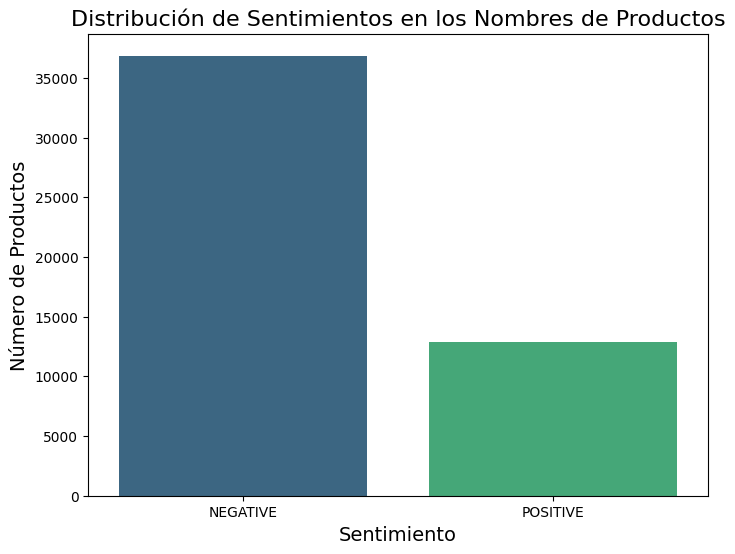

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Resumen de las estadísticas de sentimiento
sentiment_summary = df['simple_sentiment'].value_counts()

# Crear gráfico de barras para mostrar la distribución de sentimientos
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_summary.index, y=sentiment_summary.values, palette='viridis')

# Añadir etiquetas y título
plt.title('Distribución de Sentimientos en los Nombres de Productos', fontsize=16)
plt.xlabel('Sentimiento', fontsize=14)
plt.ylabel('Número de Productos', fontsize=14)

# Mostrar el gráfico
plt.show()


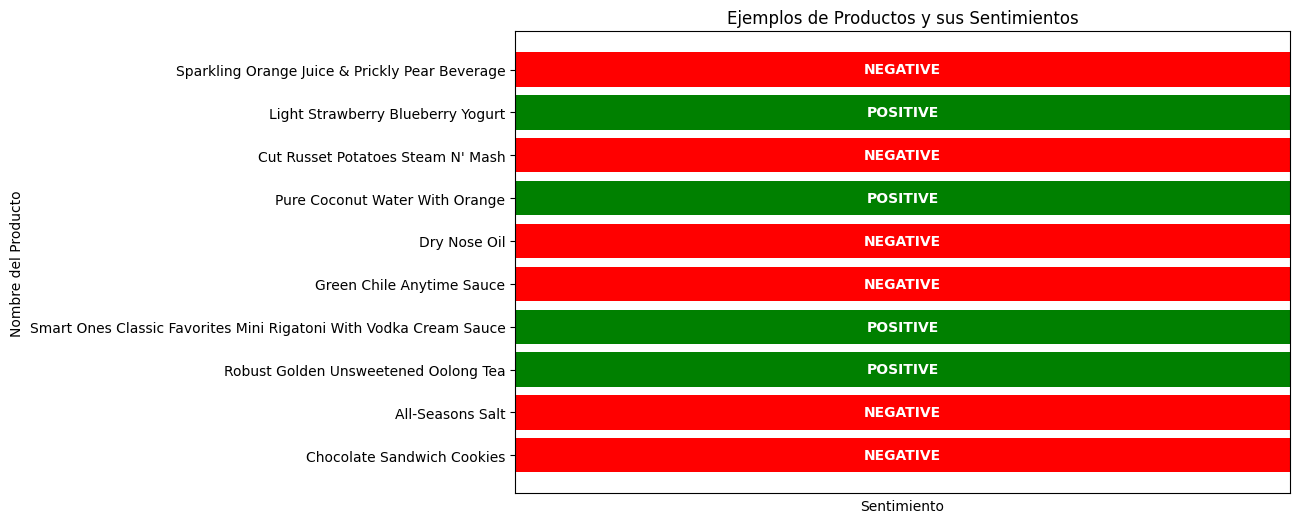

In [21]:
import matplotlib.pyplot as plt

# Seleccionar los primeros 10 productos para visualización (puedes cambiar el número)
top_productos = df[['product_name', 'simple_sentiment']].head(10)

# Asignar un color para los sentimientos
top_productos['color'] = top_productos['simple_sentiment'].apply(lambda x: 'green' if x == 'POSITIVE' else 'red')

# Crear gráfico de barras
plt.figure(figsize=(10,6))
plt.barh(top_productos['product_name'], [1]*len(top_productos), color=top_productos['color'])

# Etiquetas y título
plt.xlabel('Sentimiento')
plt.title('Ejemplos de Productos y sus Sentimientos')
plt.xlim(0, 1)
plt.xticks([])  # Quitar las etiquetas en el eje X, solo usamos barras de color
plt.ylabel('Nombre del Producto')

# Agregar etiquetas de sentimiento
for i, v in enumerate(top_productos['simple_sentiment']):
    plt.text(0.5, i, v, ha='center', va='center', color='white', fontweight='bold')

# Mostrar gráfico
plt.show()
